## Kernel Ridge Regression to predict a multi-dimensional dataset. 
## By:  Danyal Khattak

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV  
from sklearn.metrics.pairwise import polynomial_kernel


# Loading the dataset
df = pd.read_csv("training_set.csv")

# Reporting descriptive statistics
print(df.describe())

               X0          X1          X2          X3          X4          X5  \
count  750.000000  750.000000  750.000000  750.000000  750.000000  750.000000   
mean     2.519700    2.459476    2.564704    2.485659    2.492346    2.552303   
std      1.417405    1.434879    1.440272    1.406441    1.421899    1.439931   
min      0.001262    0.023160    0.000058    0.000789    0.000673    0.001135   
25%      1.356004    1.228638    1.230003    1.347662    1.293080    1.330573   
50%      2.552419    2.519088    2.686080    2.428134    2.420943    2.646105   
75%      3.773946    3.685678    3.815053    3.641781    3.740733    3.773586   
max      4.983416    4.988361    4.994463    4.993965    4.997069    4.997295   

               X6          X7          X8          X9  ...         X11  \
count  750.000000  750.000000  750.000000  750.000000  ...  750.000000   
mean     2.487033    2.510325    2.564264    2.426529  ...    2.509890   
std      1.451266    1.466703    1.401814    1.4

In [126]:
# Data Preprocessing

# Splitting data into features and target variable
X = df.iloc[:, :-1]  # All columns except the last are features
y = df.iloc[:, -1]   # The last column is the target variable

# Splitting data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.25, random_state=42
)  # 25% for validation, ensuring reproducibility

# Standardizing the features in both training and validation sets
for col in X_train.columns:
    col_mean = X_train[col].mean()  # Is calculating mean for the column
    col_std = X_train[col].std()    # Is calculating standard deviation
    # Is standardizing by subtracting mean, dividing by standard deviation:
    X_train[col] = (X_train[col] - col_mean) / col_std 
    X_validation[col] = (X_validation[col] - col_mean) / col_std

# Centering the target variable (subtracting the mean)
y_mean = y_train.mean()
y_train -= y_mean
y_validation -= y_mean 

In [127]:
    #To answer the question of which kernel function to use: the Linear, Polynomial, and Gaussian (RBF) Kernel functions are assessed for their performance giventhe test data. 
    #The standard of assessment is the lowest Mean Squared Error

df = pd.read_csv("training_set.csv")

# Separating features and target variable
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
    
# Splitting the training_set data into test and train sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [128]:
#Function 1: Creating a Kernel Ridge Regression object with a linear Function
lin_function = KernelRidge(alpha=1.0, kernel='linear')  

# Fiting the model to the training data
lin_function.fit(X_train, y_train) 

# Using the trained model for predictions on the test set
y_pred = lin_function.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse_lin = mean_squared_error(y_test, y_pred)

# Printing the result
print("Linear Kernel Mean Squared Error (MSE):", mse_lin)

Linear Kernel Mean Squared Error (MSE): 0.49093501920181276


In [129]:
#Function 2: Creating a Kernel Ridge Regression object with a Polynomial Kernel
# Creating a Kernel Ridge Regression model with a polynomial kernel

poly_function = KernelRidge(alpha=1.0, kernel='poly', degree=2)
# After trying different degrees, a degree of 2 offers the lowest MSE, as compared to other degrees, the MSE's of which are:
# Degree 1: 0.4436
# Degree 2: 0.2083*
# Degree 3: 0.2126
# Degree 4: 0.3060
# Degree 5: 0.4581

# Fitting the model to the training data
poly_function.fit(X_train, y_train) 

# Making predictions on the test set
y_pred_poly = poly_function.predict(X_test)

# Calculating MSE
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("Polynomial Kernel Mean Squared Error (MSE):", mse_poly)


Polynomial Kernel Mean Squared Error (MSE): 0.20836734134652876


In [130]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
# Function 3: Creating a Kernel Ridge Regression object with a Gaussian Kernel

# Creating a Kernel Ridge Regression model with a Gaussian Function
gaussian_function = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.005) 

# Fitting the model to the training data
gaussian_function.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gaussian = gaussian_function.predict(X_test)

# Calculating MSE
mse_gaussian = mean_squared_error(y_test, y_pred_gaussian)

print("Gaussian Kernel (RBF) Mean Squared Error (MSE):", mse_gaussian)

Gaussian Kernel (RBF) Mean Squared Error (MSE): 0.44790989635648804


### Selected the Polynomial of Degree 2 as it had the lowest mean squared error

In [122]:
#The polynomial_kernel computation serves as an approximation of the implicit Gram matrix used in the model fitting, but it's not an exact replica due to the "kernel trick" and regularization.
# Creating an approximation of the Gram Matrix for Polynomial Kernel

K = polynomial_kernel(X_train, degree=2)  

In [123]:
print(K)

[[ 83.54881917  74.01390175  53.58026787 ...  59.25237824  55.95830019
   49.14117928]
 [ 74.01390175 134.89024989  53.68538751 ...  86.68390947  65.55593714
   56.45903313]
 [ 53.58026787  53.68538751  60.69719076 ...  48.48164648  45.43890289
   45.20170821]
 ...
 [ 59.25237824  86.68390947  48.48164648 ...  84.11199379  64.44255103
   35.34607696]
 [ 55.95830019  65.55593714  45.43890289 ...  64.44255103  87.5567849
   39.88761715]
 [ 49.14117928  56.45903313  45.20170821 ...  35.34607696  39.88761715
   69.95412457]]


In [124]:
# Shape Verification of Gram Matrix (K)
print("Gram Matrix Shape: ", K.shape)

# Symmetry Verification of Gram Matrix (K)
assert np.allclose(K,K.T)

# Value Inspection (For a small subset)
print(K[:5, :5]) 

Gram Matrix Shape:  (562, 562)
[[ 83.54881917  74.01390175  53.58026787  62.37735468  23.86591229]
 [ 74.01390175 134.89024989  53.68538751 107.96306313  46.55502913]
 [ 53.58026787  53.68538751  60.69719076  43.07117676  25.34945192]
 [ 62.37735468 107.96306313  43.07117676 134.1643817   47.63404364]
 [ 23.86591229  46.55502913  25.34945192  47.63404364  41.28213626]]


In [112]:
#Calculating the MSE for the following values of lambda, [0.005,0.01,0.04,0.06,0.08,0.1,0.12,0.14, 0.16, 0.18, 0.2,0.25,0.3,0.35, 0.4, 0.5] using cross validation. 

# Defining parameters for grid search
param_grid = {'alpha': [0.005,0.01,0.04,0.06,0.08,0.1,0.12,0.14, 0.16, 0.18, 0.19, 0.2,0.25,0.3,0.35, 0.4, 0.5],
              'kernel': ['poly'],
              'degree': [2]}  

# Creating a Kernel Ridge Regression estimator (base model)
krr_estimator = KernelRidge()

# Setting up grid search with cross-validation
grid_search = GridSearchCV(krr_estimator, param_grid, cv=5, scoring='neg_mean_squared_error') 
grid_search.fit(X_train, y_train)  

# Printing results for each parameter combination
for i in range(len(grid_search.cv_results_['params'])):
    params = grid_search.cv_results_['params'][i]
    mean_score = grid_search.cv_results_['mean_test_score'][i]
    mse = -mean_score
    lambda_value = params['alpha']
    print(f"MSE: {mse:.4f}, Lambda: {lambda_value}")

# Best parameters (as before)
print("Best parameters:", grid_search.best_params_) 

MSE: 0.2126, Lambda: 0.005
MSE: 0.2118, Lambda: 0.01
MSE: 0.2082, Lambda: 0.04
MSE: 0.2068, Lambda: 0.06
MSE: 0.2058, Lambda: 0.08
MSE: 0.2051, Lambda: 0.1
MSE: 0.2046, Lambda: 0.12
MSE: 0.2044, Lambda: 0.14
MSE: 0.2043, Lambda: 0.16
MSE: 0.2043, Lambda: 0.18
MSE: 0.2044, Lambda: 0.19
MSE: 0.2045, Lambda: 0.2
MSE: 0.2052, Lambda: 0.25
MSE: 0.2063, Lambda: 0.3
MSE: 0.2077, Lambda: 0.35
MSE: 0.2092, Lambda: 0.4
MSE: 0.2125, Lambda: 0.5
Best parameters: {'alpha': 0.16, 'degree': 2, 'kernel': 'poly'}


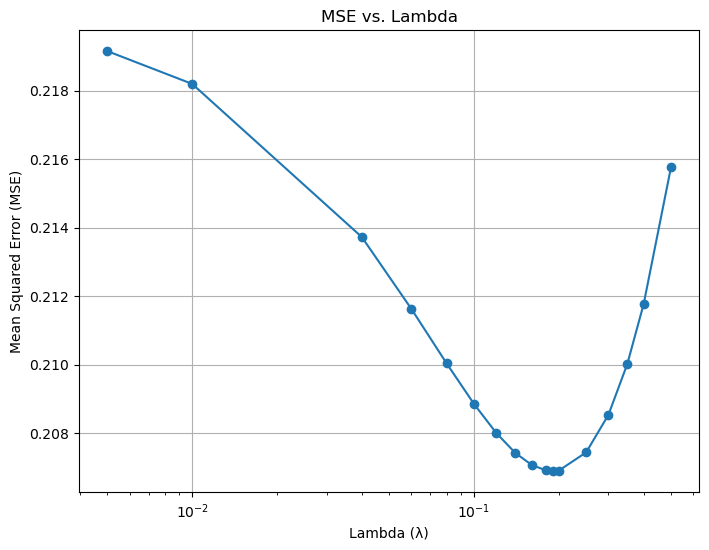

In [87]:
import matplotlib.pyplot as plt

# Importing data from grid search results
lambda_values = [params['alpha'] for params in grid_search.cv_results_['params']]
mse_values = -grid_search.cv_results_['mean_test_score']

# Creating the plot for MSE vs Lambda
plt.figure(figsize=(8, 6))
plt.plot(lambda_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Lambda (λ)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Lambda')
plt.xscale('log')  # Set logarithmic scale for x-axis (lambda)
plt.grid(True)

plt.show()


#Selected range of lambdas: 0.08 to 0.35, with the lowest MSE at 0.19

In [139]:
def calculate_df(K, lam):
  n = K.shape[0]
  H_lam = K @ np.linalg.inv(K + lam * np.eye(n))
  df = np.trace(H_lam)
  return df

def calculate_dfs_for_lam_range(K, start_lam, end_lam, num_lam): #Calculates the degrees of freedom for various lambda values. 
    lam_values = [0.08,0.1,0.12,0.14, 0.16, 0.18,0.19, 0.2,0.25,0.3,0.35]

lam_values_range = [0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.19, 0.2, 0.25, 0.3, 0.35]

# Calculate degrees of freedom
degrees_of_freedom = [calculate_df(K, lam) for lam in lam_values_range]


for lam, df in zip(lam_values_range, degrees_of_freedom):
  print(f"Lambda: {lam:.3f}, Degrees of Freedom: {df:.3f}")

Lambda: 0.080, Degrees of Freedom: 226.301
Lambda: 0.100, Degrees of Freedom: 225.262
Lambda: 0.120, Degrees of Freedom: 224.261
Lambda: 0.140, Degrees of Freedom: 223.292
Lambda: 0.160, Degrees of Freedom: 222.354
Lambda: 0.180, Degrees of Freedom: 221.443
Lambda: 0.190, Degrees of Freedom: 220.996
Lambda: 0.200, Degrees of Freedom: 220.556
Lambda: 0.250, Degrees of Freedom: 218.436
Lambda: 0.300, Degrees of Freedom: 216.435
Lambda: 0.350, Degrees of Freedom: 214.536


In [137]:
# Parameters
num_splits = 5 

# Results storage
results_lin = np.zeros(num_splits)
results_poly = np.zeros(num_splits)
results_ols = np.zeros(num_splits)

# Function to loop through splits 
for i in range(num_splits):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 + i) # For different random iterations

  # Polynomial Kernel
  poly_function = KernelRidge(alpha=0.019, kernel='poly', degree=2)
  poly_function.fit(X_train, y_train) 
  y_pred_poly = poly_function.predict(X_test)
  results_poly[i] = mean_squared_error(y_test, y_pred_poly)

  # OLS Benchmark
  ols_model = LinearRegression()
  ols_model.fit(X_train, y_train)
  y_pred_ols = ols_model.predict(X_test)
  results_ols[i] = mean_squared_error(y_test, y_pred_ols) 


# Print average MSEs across splits
print("Average MSE Polynomial Kernel, across splits:", np.mean(results_poly))
print("Average MSE OLS, across splits:", np.mean(results_ols)) 

# Due to some invisible, non-breaking space I was not able to run the code for range of Lambdas, however I decided to select the lambda with the lowest MSE calculated from before. 

Average MSE Polynomial Kernel, across splits: 0.1517492804592719
Average MSE OLS, across splits: 0.4392103668913217


In [141]:
#Loading the data
test_data = pd.read_csv("test_set.csv")
X_test = test_data.iloc[:, :]

model = best_model  

# Making predictions using trained model
predictions = model.predict(X_test)

# Saving predictions to CSV
pd.DataFrame(predictions).to_csv("submission.csv", index=False, header="Predictions") 
